In [1]:
import cv2
import math
import pickle
import numpy as np

from evaluate import FDDBImg

In [12]:
with open('fddb_mtcnn.pkl', 'rb') as pfile:
    results = pickle.load(pfile)

In [13]:
truepos = 0
falsepos = 0
falseneg = 0
for img in results:
    met = img.compute_metrics()
    truepos += met[0]
    falsepos += met[1]
    falseneg += met[2]

print(truepos, falsepos, falseneg)
print('Precision', truepos / (truepos + falsepos))
print('Recall', truepos / (truepos + falseneg))

971 10677 17
Precision 0.08336195054945054
Recall 0.9827935222672065


In [14]:
dets = []
for img in results:
    _, _, _, pred_det, _ = img.compute_metrics(returnArrs=True)
    assert len(pred_det) == len(img.pred_conf)
    for i in range(len(pred_det)):
        dets.append((img.pred_conf[i], pred_det[i]))

dets = sorted(dets)
print(dets[:100])

[(1.2635809980565682e-05, False), (2.247511838504579e-05, False), (2.5227534933947027e-05, False), (3.69867411791347e-05, False), (3.926028512069024e-05, False), (4.3509029637789354e-05, False), (4.8747300752438605e-05, False), (5.11300859216135e-05, False), (5.854769915458746e-05, False), (5.8749767049448565e-05, False), (5.924938159296289e-05, False), (5.978493209113367e-05, False), (6.010321885696612e-05, False), (6.971350376261398e-05, False), (7.197665399871767e-05, False), (7.470959826605394e-05, False), (7.551964517915621e-05, False), (7.679804548388347e-05, False), (7.862196071073413e-05, False), (8.132575749186799e-05, False), (8.190018706955016e-05, False), (8.358821651199833e-05, False), (8.531004277756438e-05, False), (8.59974607010372e-05, False), (9.247208072338253e-05, False), (9.442723239772022e-05, False), (9.968543599825352e-05, False), (0.00011281201295787469, False), (0.00011391103180358186, False), (0.00011826243280665949, False), (0.00012005952157778665, False), (

In [15]:
precArr = []
recallArr = []
trueposA = truepos
falseposA = falsepos
falsenegA = falseneg
print(trueposA, falseposA, falsenegA)
for d in dets:
    precArr.append(trueposA / (trueposA + falseposA))
    recallArr.append(trueposA / (trueposA + falsenegA))
    if d[1]:
        # true pos
        trueposA -= 1
        falsenegA += 1
    else:
        # false pos
        falseposA -= 1

971 10677 17


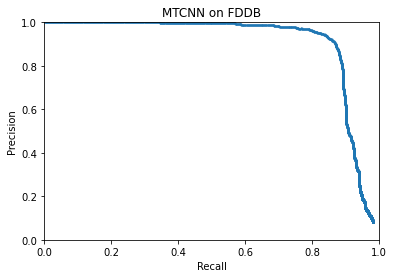

In [17]:
import matplotlib.pyplot as plt

plt.scatter(recallArr, precArr, s=0.8)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MTCNN on FDDB')
plt.show()

In [24]:
from sklearn import metrics
npRecallArr = np.array(recallArr)
npPrecArr = np.array(precArr)

idxs = np.argsort(npRecallArr)
AP = metrics.auc(npRecallArr[idxs], npPrecArr[idxs])
print('AP:', AP)

AP 0.9080002683325069
